# Name: Muhammad Fawad
# Task :  Car Price Prediction using Machine Learning

## Importing Libraries

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Exploratory Data Analysis (EDA)

In [2]:
car_dataset = pd.read_csv("D:\Datasets\Car Prediction.zip")
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Finding Null values

In [3]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### The dataset does not have any null values

### Looking important insights of dataset

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
print(car_dataset.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


### Encoding the data

In [6]:
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace = True)
car_dataset.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace = True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### The Price column is to be predicted so let's see the distribution of the values of the Price column

C:\Users\hp\AppData\Local\Temp\ipykernel_4080\3326203304.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_dataset.Selling_Price)


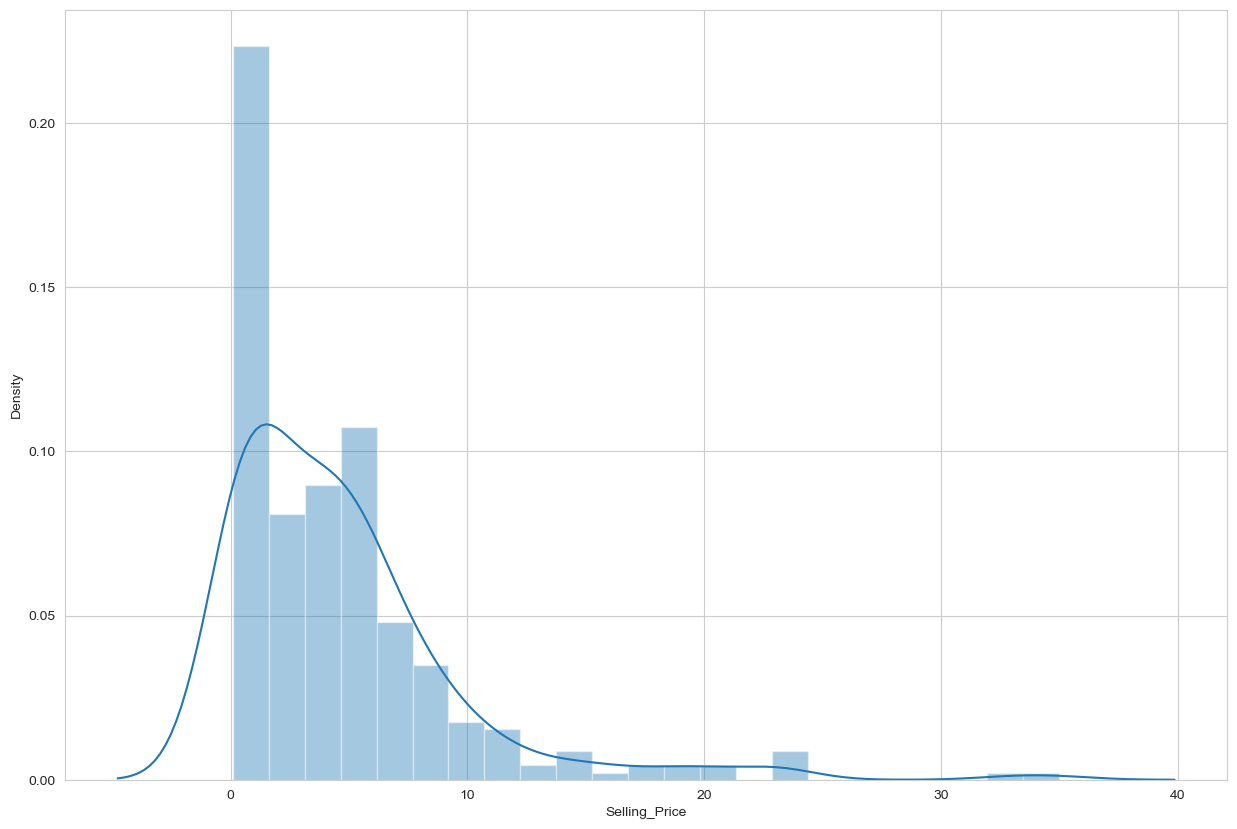

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 10))
sns.distplot(car_dataset.Selling_Price)
plt.show()

In [8]:
dataset = car_dataset.drop(['Car_Name'], axis = 1)

## Finding the correlation of the dataset

In [9]:
print(dataset.corr())

                   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
Year           1.000000       0.236141      -0.047192   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878914    0.029187   0.509467   
Present_Price -0.047192       0.878914       1.000000    0.203618   0.440493   
Driven_kms    -0.524342       0.029187       0.203618    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440493    0.166801   1.000000   
Selling_type  -0.039896      -0.550724      -0.512121   -0.101419  -0.352415   
Transmission  -0.000394       0.367128       0.348776    0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008058    0.089216  -0.055705   

               Selling_type  Transmission     Owner  
Year              -0.039896     -0.000394 -0.182104  
Selling_Price     -0.550724      0.367128 -0.088344  
Present_Price     -0.512121      0.348776  0.008058  
Driven_kms        -0.101419      0.162510  0.089216  
Fuel_Type

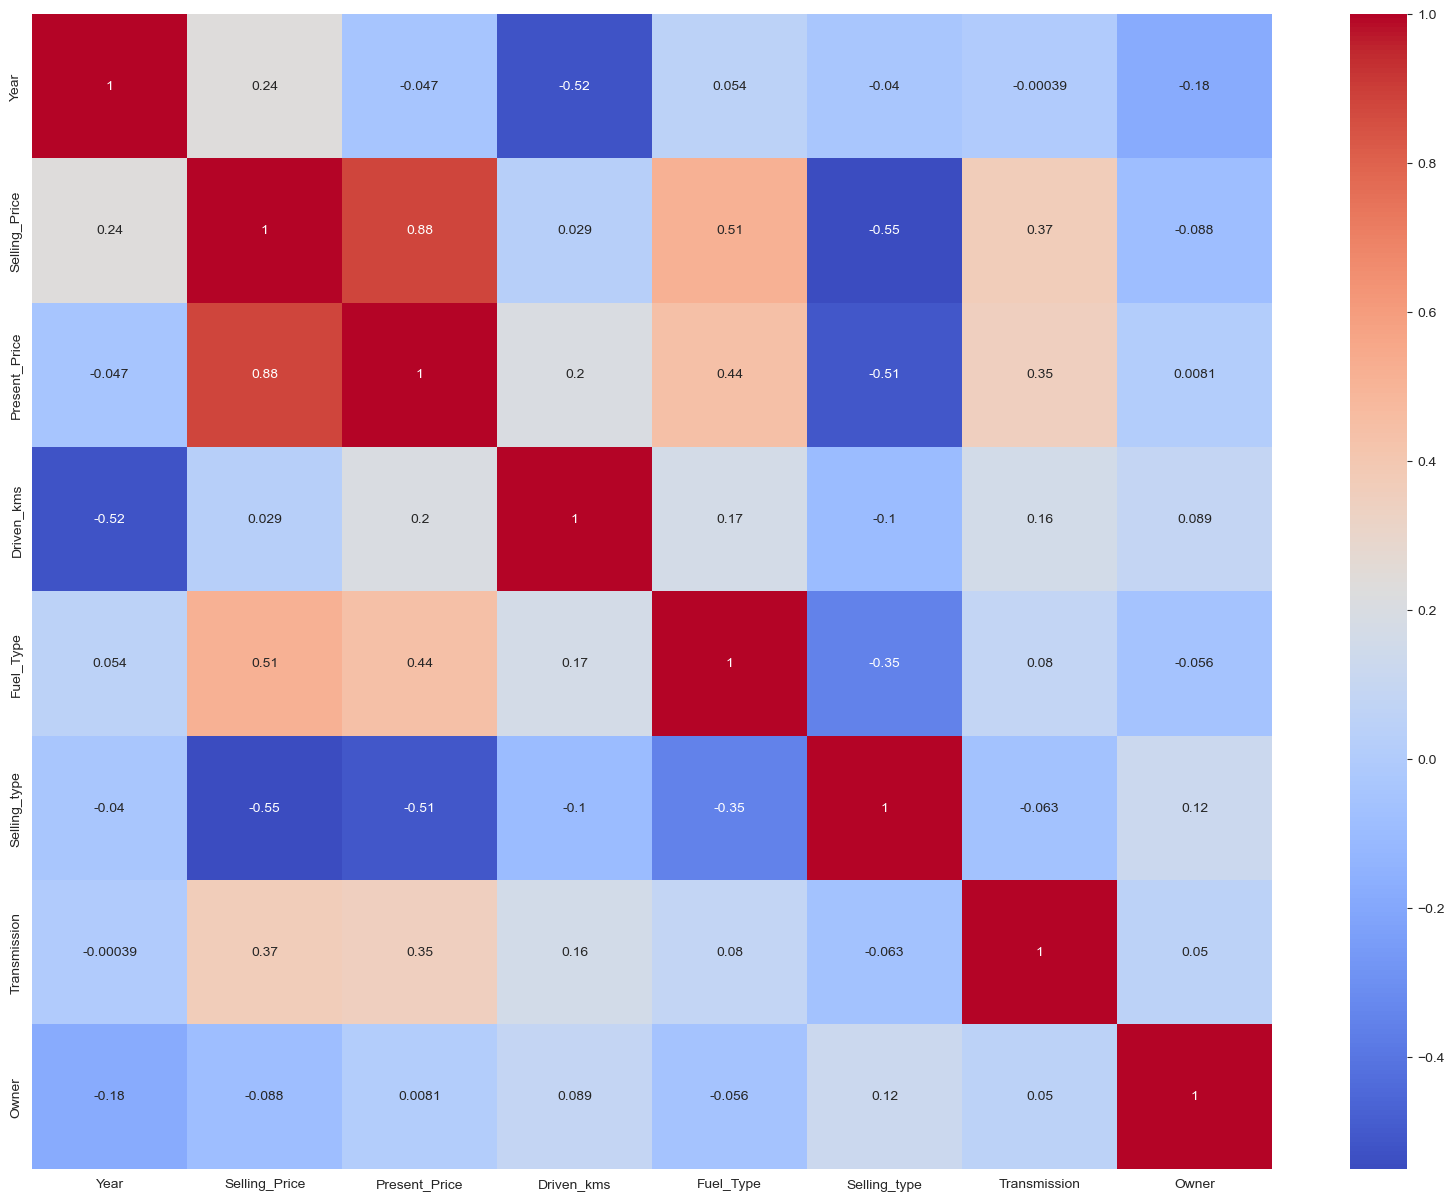

In [10]:
plt.figure(figsize = (20, 15))
correlations = dataset.corr()
sns.heatmap(correlations, cmap = "coolwarm", annot = True)
plt.show()

## Training a Car Price Prediction Model

In [11]:
predict = "Selling_Price"
X = np.array(dataset.drop([predict], axis = 1))
Y = np.array(dataset[predict])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
model.score(X_test, predictions)

1.0

#### The model gives 100% accuracy.